In [5]:
# step 0 import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [6]:
# step 1 Read the data

bikes = pd.read_csv("hour.csv")

- index: Gözlem numarası.
- date: Tarih (Gün/Ay/Yıl formatında).
- season: Mevsim (1: İlkbahar, 2: Yaz, 3: Sonbahar, 4: Kış).
- year: Yıl (0: 2011, 1: 2012).
- month: Ay (1-12 arasında değer alır).
- hour: Saat (0-23 arasında değer alır).
- holiday: Tatil günü olup olmadığı (0: Hayır, 1: Evet).
- weekday: Haftanın günü (0: Pazar, 1: Pazartesi, ... , 6: Cumartesi).
- workingday: Çalışma günü olup olmadığı (0: Hayır, 1: Evet).
- weather: Hava durumu (1: Açık, 2: Bulutlu, 3: Yağmurlu, 4: Fırtınalı).
- temp: Sıcaklık (0-1 arasında normalize edilmiş değer).
- atemp: Hissedilen sıcaklık (0-1 arasında normalize edilmiş değer).
- humidity: Nem oranı (0-1 arasında normalize edilmiş değer).
- windspeed: Rüzgar hızı (0-1 arasında normalize edilmiş değer).
- casual: Kayıtsız (anlık) bisiklet kiralamaları.
- registered: Kayıtlı kullanıcıların bisiklet kiralamaları.
- demand: Toplam bisiklet talebi (casual + registered).
 
* Bu veri seti, bisiklet kiralama talebini etkileyen faktörleri analiz etmek için kullanılıyor. Değişkenler, hava durumu, tatil günleri ve günün saatine göre bisiklet kiralamalarının nasıl değiştiğini incelemek için oldukça yararlı.

In [8]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
# step 2 Analysis and future selection
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index', 'date' , 'casual', 'registered'], axis=1)
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

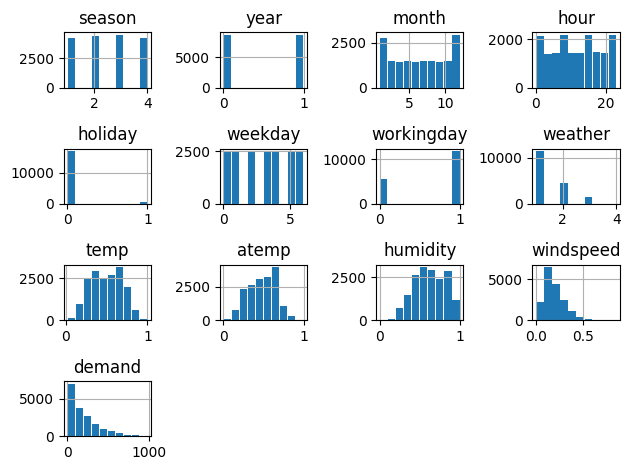

In [16]:
# create pandas histogram
bikes_prep.hist(rwidth = 0.9);
plt.tight_layout()

In [17]:
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


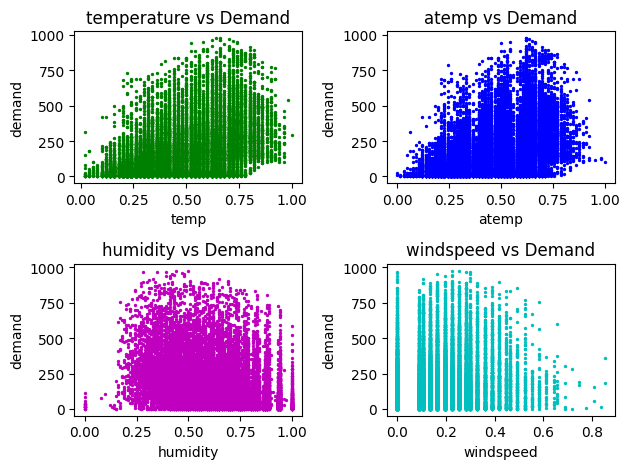

In [18]:
# step 3 Data visualization
# visualise the continuous features vs demand
plt.subplot(2,2,1)
plt.title('temperature vs Demand')
plt.xlabel('temp')
plt.ylabel('demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=2, c='g');

plt.subplot(2,2,2)
plt.title('atemp vs Demand')
plt.xlabel('atemp')
plt.ylabel('demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b');

plt.subplot(2,2,3)
plt.title('humidity vs Demand')
plt.xlabel('humidity')
plt.ylabel('demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('windspeed vs Demand')
plt.xlabel('windspeed')
plt.ylabel('demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='c');
plt.tight_layout()
# temperature ve atempi gozledigimde birbirine cok benx=zedigi icin bir tanesini silebiliriz.

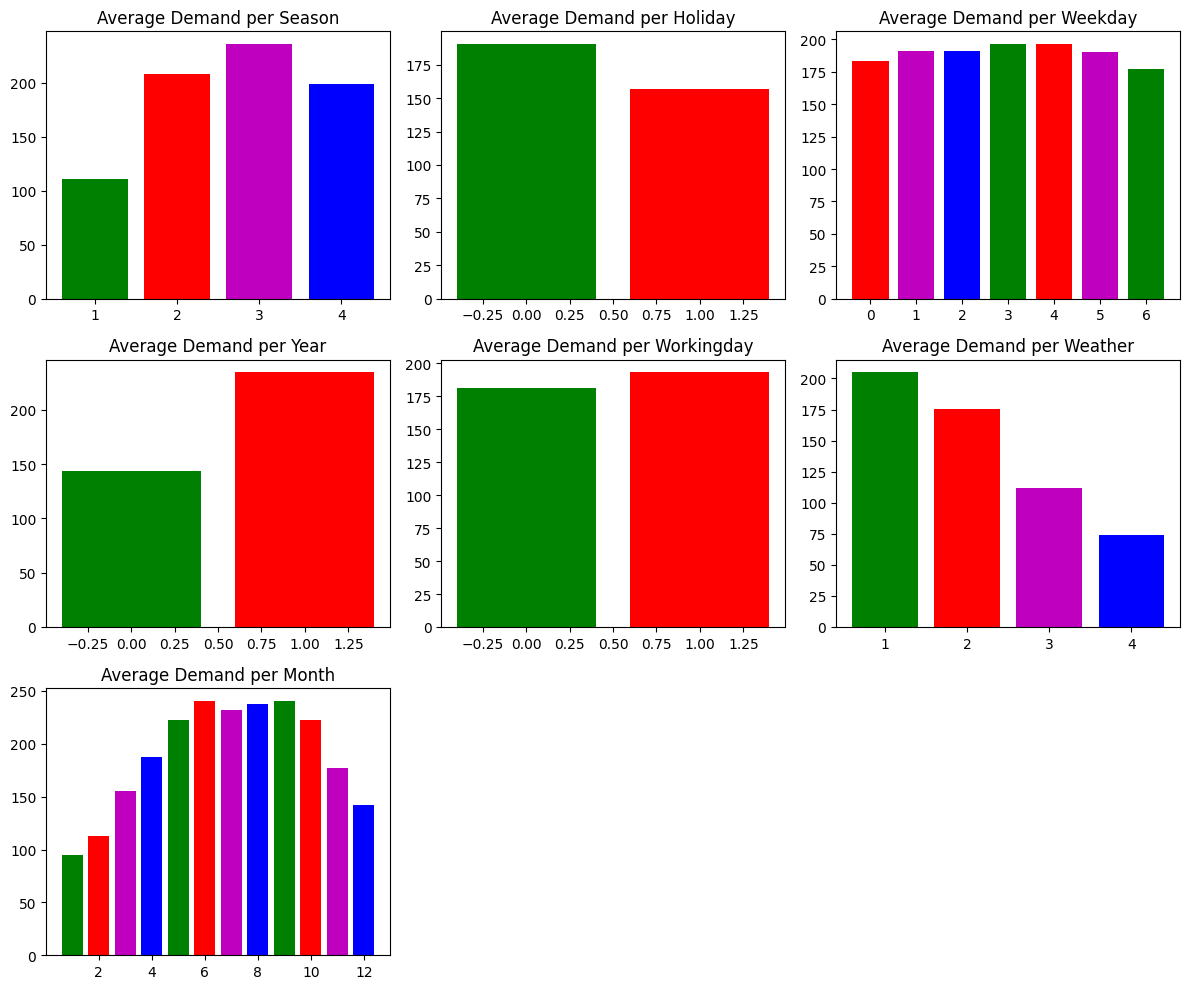

In [21]:
# Visualize the categorical features
categorical_vars = ['season', 'holiday', 'weekday', 'year', 'workingday', 'weather','month']

colors = ['g', 'r', 'm', 'b']

# Grafikleri oluşturmak için döngü
plt.figure(figsize=(12, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    plt.title(f'Average Demand per {var.capitalize()}')
    cat_list = bikes_prep[var].unique()
    cat_avg = bikes_prep.groupby(var).mean()['demand']
    plt.bar(cat_list, cat_avg, color=colors)
    

plt.tight_layout()
plt.show()


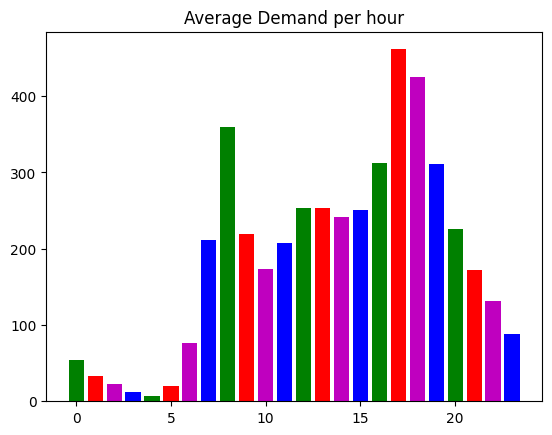

In [23]:
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_avg = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_avg, color=colors);

In [26]:
# Check for outliers
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [28]:
#  burda aykiri degerleri bulduk yukarida max deger 977 diyor ama bu sairda
# degerlerin %99 782 ve ondan kucuk degerlere sahip demekki burda aykiri deger var
# yani %1 sadece 782 den buyuk
bikes_prep['demand'].quantile([.05,.15,.50,.95,.99])

0.05      5.00
0.15     16.00
0.50    142.00
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [30]:
df_demand = bikes_prep['demand']

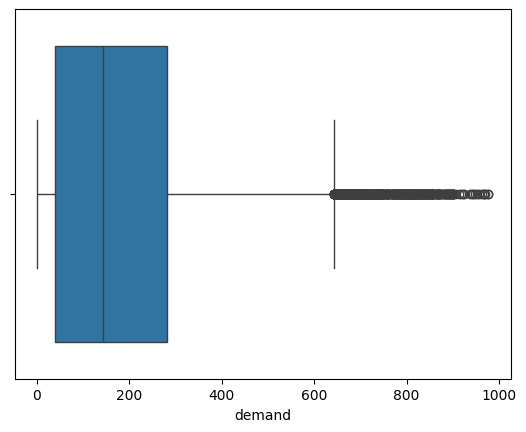

In [32]:
sns.boxplot(x = df_demand);

In [35]:
# step 4 Check multiple linner regression Assumptions
# Linearity using correlation coefficent matrix using corr
correlation  = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()

In [37]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [39]:
# step 5 Drop irrelevant features
bikes_prep = bikes_prep.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1)

In [41]:
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


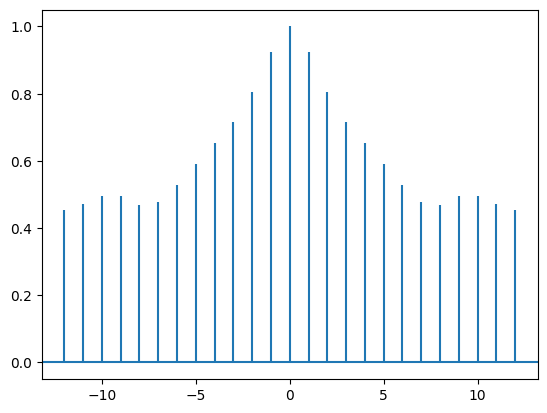

In [43]:
# Autocorrelation of demand using acor
df1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
plt.acorr(df1, maxlags=12);

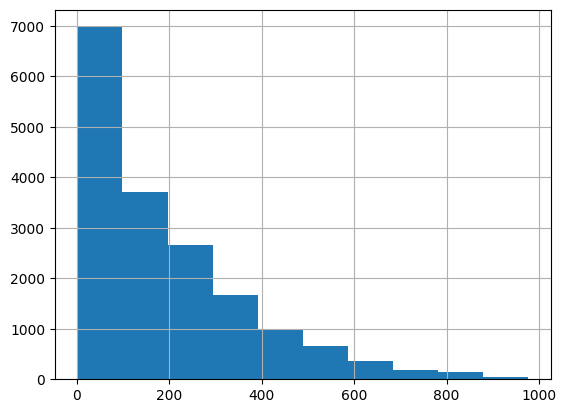

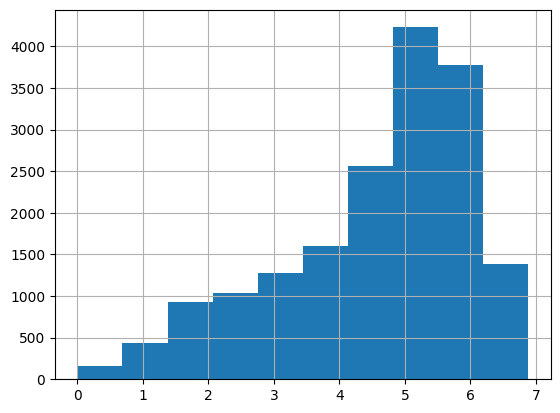

In [44]:
# step 6 Create / Modify new features
# Log Normalise the feature 'demand'
df1 =  bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist()

plt.figure()
df2.hist()
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [47]:
# slove the problem of Autocorrelation
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t_1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t_2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t_3']
bikes_prep_leg = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)
bikes_prep_leg = bikes_prep_leg.dropna()

In [49]:
bikes_prep_leg

,season,month,hour,holiday,weather,temp,humidity,demand,t_1,t_2,t_3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [51]:
# step 7 Create Dumy Variables and drop first to avoid dummy variables
bikes_prep_leg['season'] = bikes_prep_leg['season'].astype('category')
bikes_prep_leg['holiday'] = bikes_prep_leg['holiday'].astype('category')
bikes_prep_leg['weather'] = bikes_prep_leg['weather'].astype('category')
bikes_prep_leg['month'] = bikes_prep_leg['month'].astype('category')
bikes_prep_leg['hour'] = bikes_prep_leg['hour'].astype('category')
bikes_prep_leg = pd.get_dummies(bikes_prep_leg, drop_first=True)

In [53]:
bikes_prep_leg.head()

,temp,humidity,demand,t_1,t_2,t_3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
bikes_prep_leg.dtypes.count()

47

In [57]:
# step 8 Create Train and test split
from sklearn.model_selection import train_test_split
Y = bikes_prep_leg[['demand']]
X = bikes_prep_leg.drop(['demand'], axis=1)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=1234)  


In [59]:
tr_size = 0.7*len(X)
tr_size = int(tr_size)

In [65]:
x_train = X.values[0:tr_size]
x_test = X.values[tr_size:len(X)]

y_train = Y.values[0:tr_size]
y_test = Y.values[tr_size:len(Y)]

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

std_reg = LinearRegression()
std_reg.fit(x_train, y_train)

r2_train = std_reg.score(x_train, y_train)
r2_test = std_reg.score(x_test, y_test)

y_predict = std_reg.predict(x_test)


In [93]:
r2_test

0.9287151360253387

In [95]:
r2_train

0.9195240591465778

In [97]:
rmse = math.sqrt(mean_squared_error(y_test, y_predict))

In [99]:
rmse

0.3809880049817041

In [ ]:
# step 9 fit and score the model  